# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Шаг 1. Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
flats = pd.read_csv ('/datasets/real_estate_data.csv', sep='\t')


In [2]:
flats.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [3]:
flats.shape

(23699, 22)

### Вывод

Параметром sep были разделены данные чтобы их проще было читать. 

### Шаг 2. Предобработка данных

In [4]:
flats.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [5]:
flats.duplicated().sum()

0

Мы имеем пропуски в следующих стобцах:

ceiling_height - высота потолков. К сожалению, эти пропуски придется оставить, но надо сообщить о них команде. 

floors_total - всего этажей. Пока тоже оставим. Ни среднее, ни медиану сюда не подставить. 

living_area - жилая площадь. Так как у нас есть апартаменты, то возможно, эти пропуски связаны с ними. Надо проверить. 

is_apartment - аппартаменты это или нет. Важная информация, надо передать ин-фц команде о пропусках. 

kitchen_area - площадь кухни. Опять стоит поискать зависимость с апартаментами. 

balcony - коллиечство балконов - пропуски можно заменить на 0. 

locality_name - название населенного пункта. Сообщить команде.

airports_nearest - расстояние до ближ аэропорта. Оставим как есть. 

cityCenters_nearest - растояние до центра. Оставим как есть. 

parks_around3000 - парки в районе 3000м. Оставим как есть 

ponds_nearest - парки рядом. Оставим как есть.

days_exposition - срок размещения объявления. Сообщить команде, что есть пропуски по этому пункту.  

In [6]:
flats_grouped = flats.groupby('is_apartment')['living_area'].median()
flats_grouped

is_apartment
False    31.00
True     33.25
Name: living_area, dtype: float64

In [7]:
flats_grouped = flats.groupby('is_apartment')['kitchen_area'].median()
flats_grouped

is_apartment
False     9.8
True     11.7
Name: kitchen_area, dtype: float64

In [8]:
flats['balcony'] = flats['balcony'].fillna(0)
flats['ceiling_height'] = flats['ceiling_height'].fillna(0)


In [9]:
flats_k_area_new = flats['kitchen_area'] / flats['total_area']
flats_k_area_new_1 = flats_k_area_new.mean()
flats_k_area_new_2 = flats_k_area_new_1 * flats['total_area']
flats_k_area_new_2.median()

9.742446416130512

In [10]:
flats['kitchen_area'].median()

9.1

In [11]:
flats['living_area'].median()

30.0

In [12]:
flats_l_area_new = flats['living_area'] / flats['total_area']
flats_l_area_new_1 = flats_l_area_new.mean()
flats_l_area_new_2 = flats_l_area_new_1 * flats['total_area']
flats_l_area_new_2.median()

29.367807128364817

In [13]:
flats['living_area'] = flats['living_area'].fillna(flats_l_area_new_2)

In [14]:
flats['kitchen_area'] = flats['kitchen_area'].fillna(flats_k_area_new_2)

In [15]:
flats['ceiling_height'] = flats['ceiling_height'].fillna(0)

In [16]:
flats.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total               86
living_area                 0
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Заменили пропуски в 'balcony' так как если там ничего не указано, то скорее всего их 0. Зависимость пропусков в 'kitchen_area' и  'living_area' от того, апартаменты это или нет, замечено не было. Так что везде, где пропуски нечем заменить, оставим пустое значение. Отсуствующие значения в высоте потолков заменили на 0. Пропуски в стобцах living_area и kitchen_area заменили на расчеты(средняя длина кухни/жил площади умноженные на общую площадь квартиры. Медианое значение кухни поменялось с  9.1 на 9.7. Медианное значение жил площади с 30.0 на 29.3.

Пропуски не выглядт как какая-то закономерность. Вполне возможно, что они появились при невнимательном заполнении. 

In [17]:
flats.dtypes

total_images              int64
last_price              float64
total_area              float64
first_day_exposition     object
rooms                     int64
ceiling_height          float64
floors_total            float64
living_area             float64
floor                     int64
is_apartment             object
studio                     bool
open_plan                  bool
kitchen_area            float64
balcony                 float64
locality_name            object
airports_nearest        float64
cityCenters_nearest     float64
parks_around3000        float64
parks_nearest           float64
ponds_around3000        float64
ponds_nearest           float64
days_exposition         float64
dtype: object

In [18]:
convert_dict = {        
                'balcony': int,
                'is_apartment': bool,
                'last_price': int,
               } 
 
flats = flats.astype(convert_dict) 
print(flats.dtypes) 

total_images              int64
last_price                int64
total_area              float64
first_day_exposition     object
rooms                     int64
ceiling_height          float64
floors_total            float64
living_area             float64
floor                     int64
is_apartment               bool
studio                     bool
open_plan                  bool
kitchen_area            float64
balcony                   int64
locality_name            object
airports_nearest        float64
cityCenters_nearest     float64
parks_around3000        float64
parks_nearest           float64
ponds_around3000        float64
ponds_nearest           float64
days_exposition         float64
dtype: object


Перевели balcony в int, is_apartment в bool, last_price в целочисленные значения. Столбцы living_area, total_area, ceiling_height, kitchen_area считаю не нужным переводить в тип данных int, так как изначалльно нам важны тут числа не целочисленные.

### Шаг 3. Посчитайте и добавьте в таблицу

In [19]:
flats['price_meter'] = flats['last_price'] / flats['total_area']

In [20]:
 flats['first_day_exposition'].head(5)

0    2019-03-07T00:00:00
1    2018-12-04T00:00:00
2    2015-08-20T00:00:00
3    2015-07-24T00:00:00
4    2018-06-19T00:00:00
Name: first_day_exposition, dtype: object

In [21]:
flats['first_day_exposition'] = pd.to_datetime(flats['first_day_exposition'],format='%Y-%m-%d %H:%M')
flats['first_weekday_exposition'] = flats['first_day_exposition'].dt.weekday 
flats['first_month_exposition'] = pd.DatetimeIndex(flats['first_day_exposition']).month
flats['first_year_exposition'] = pd.DatetimeIndex(flats['first_day_exposition']).year


In [22]:
def floor_name(row):
    floor = row['floor']
    floors_total = row['floors_total']
    if floor != 1 and floor != floors_total:
        return 'другой'
    if floor != 1 and floor == floors_total:
        return 'последний'
    if floor == 1:
        return 'первый'
    return 'неизвестно'
flats['floor_name'] = flats.apply(floor_name, axis=1)
flats['floor_name'].value_counts()
    

другой       17446
последний     3336
первый        2917
Name: floor_name, dtype: int64

In [23]:
flats['living_to_total'] = flats['living_area'] / flats['total_area'] 
flats['kitchen_to_total'] = flats['kitchen_area'] / flats['total_area']
flats.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_meter,first_weekday_exposition,first_month_exposition,first_year_exposition,floor_name,living_to_total,kitchen_to_total
0,20,13000000,108.00,2019-03-07,3,2.70,16.0,51.000000,8,True,...,2.0,755.0,NaN,120370.370370,3,3,2019,другой,0.472222,0.231481
1,7,3350000,40.40,2018-12-04,1,0.00,11.0,18.600000,1,True,...,0.0,NaN,81.0,82920.792079,1,12,2018,первый,0.460396,0.272277
2,10,5196000,56.00,2015-08-20,2,0.00,5.0,34.300000,4,True,...,2.0,574.0,558.0,92785.714286,3,8,2015,другой,0.612500,0.148214
3,0,64900000,159.00,2015-07-24,3,0.00,14.0,89.797718,9,True,...,3.0,234.0,424.0,408176.100629,4,7,2015,другой,0.564766,0.187355
4,2,10000000,100.00,2018-06-19,2,3.03,14.0,32.000000,13,True,...,1.0,48.0,121.0,100000.000000,1,6,2018,другой,0.320000,0.410000
5,10,2890000,30.40,2018-09-10,1,0.00,12.0,14.400000,5,True,...,NaN,NaN,55.0,95065.789474,0,9,2018,другой,0.473684,0.299342
6,6,3700000,37.30,2017-11-02,1,0.00,26.0,10.600000,6,True,...,0.0,NaN,155.0,99195.710456,3,11,2017,другой,0.284182,0.386059
7,5,7915000,71.60,2019-04-18,2,0.00,24.0,40.437211,22,True,...,0.0,NaN,NaN,110544.692737,3,4,2019,другой,0.564766,0.263966
8,20,2900000,33.16,2018-05-23,1,0.00,27.0,15.430000,26,True,...,NaN,NaN,189.0,87454.764777,2,5,2018,другой,0.465320,0.265682
9,18,5400000,61.00,2017-02-26,3,2.50,9.0,43.600000,7,True,...,0.0,NaN,289.0,88524.590164,6,2,2017,другой,0.714754,0.106557


Добавили в таблицу новые столбцы: 'kitchen_to_total' и 'living_to_total' - соотношение кухни к общей площади и соотношение жилой части к общей площади. Так же появился столбец с этажами 'floor_name'. price_meter - цена за метр квадратный. irst_weekday_exposition	first_month_exposition	first_year_exposition - день недели, месяц и год, когда было впервые опубликовано объявление. 

### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

In [24]:
import matplotlib.pyplot as plt

In [25]:
columns = ['total_area', 'last_price', 'rooms', 'ceiling_height']
for name in columns:
    print(flats[name].describe())

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64
count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64
count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64
count    23699.000000
mean         1.696182
std          1.672495
min          0.000000
25%          0.000000
50%          2.500000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64


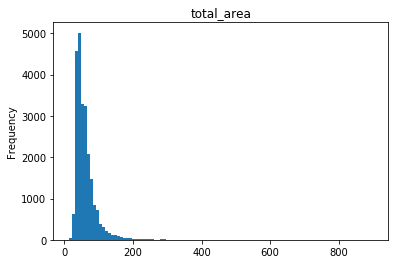

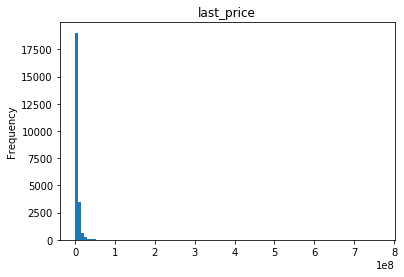

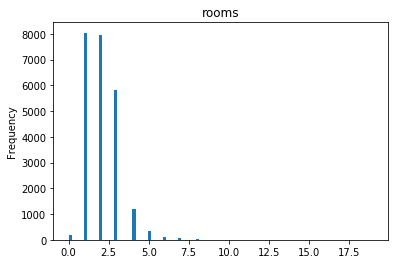

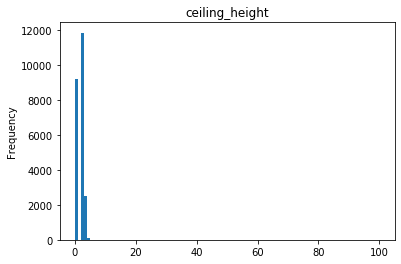

In [26]:
columns = ['total_area', 'last_price', 'rooms', 'ceiling_height']
for name in columns:
    flats[name].plot(title=name, kind='hist', bins=100)
    plt.show()

**Вывод по площади квартир** min = 12 м кв. max = 900 м кв.Средний разброс от 40 до 69 метров квадратных, что видно на графике. От 100 до 200 тоже есть квартиры. Однако выбивающиеся значения выше 250 метров кв, они встречаются редко, их даже не видно на гистрограмме. С ними позже можно будет поработать: узнать, сколько их, не ошибочные ли они, сгруппировать в отдельную категорию.   

**Вывод по цене** Максимальная цена: 763000000, минимальная цена: 12190, медианное значение 4650000. На гистрограмме видно, что много значений близких к нулю. И минимальное значение тоже подоздрительное. Надо выяснить, с чем это может быть связано, ошибка это или нет.

**Вывод по числу комнат** С комнатами все более мение понятно. Минимальное колличество - 0 комнат - это после замены наших значений. В дальнейшем мы отбросим эти значения. Максимальное - 19 команат. так как до этого мы видели общую сумму квадратных метров, возможно, это не ошибка, но все же стоит проверить. Есть несколько значений у нуля - нужно узнать, что эт за значения. А так, чаще всего встречаются однокомнатные или двухкомнатыне крватиры, чуть реже трех, а все остальное по убывающей.

**Вывод по высоте потолков** Высота потолков в 0 метров это наши пропуски. Так же высота потолков в 100 метров. По графику видно, что наибольшое колличество в промежутке от 2,5 до 2,8 метров. В целом, это отвечает стандартам. Встречаются много значений от 3 до 4 метров. Возможно, это дома в Санкт-Петербурге, где высота потолков в старых зданиях выше обычной современной застройки. При дальнейшей работе, высота потолков в 0 метров не будет учавствовать при анализе. 

### Время продажи квартиры

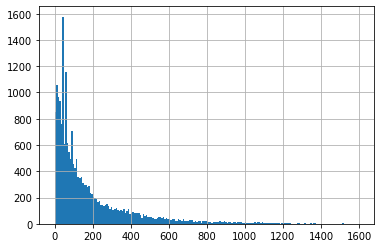

In [27]:
flats['days_exposition'].hist(bins=200, range=(0, 1600))
plt.show()

In [28]:
flats['days_exposition'].mean()

180.88863436982163

In [29]:
flats['days_exposition'].median()

95.0

In [30]:
flats['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

Минимальное значение - один день. Допустим, что такое может быть, тем более на гистограмме видно, что значений около 0 достаточно много. Больше вопросов у максимального значение - 1580 дней - объявление находилось на сайте больше 4 лет. Кажется не очень правдопадобным. Стоит это проверить. В целом, есть длинный хвост, после 1000 дней. Надо обратить на это внимание. Если продажа укладывается в 1 день - то это можнно считать очень быстрый разультат. Необчайно долго, если продажа заняла более 500 дней. В стреднем квартира продается за 95-200 дней.

### Работа с редкими и выбивающимися значениями

Для всех исследуемых столбцов будет использован метод boxplot. С его помощью можно определить выбивающиеся значения, и уже без них построить новый график.  

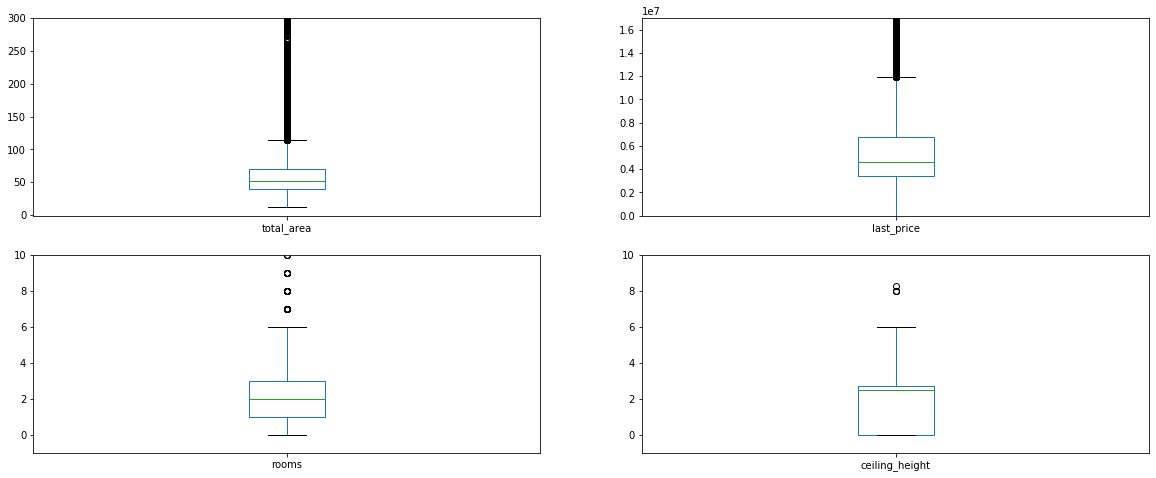

In [31]:
column_list1 = ['total_area','last_price', 'rooms', 'ceiling_height']
ax = flats[column_list1].plot(kind='box', subplots=True, layout=(2,2), figsize=(20,8))
ylims = [300, 17000000, 10, 10]
xlims = [1, 1, 1, 1]
for i in range(len(column_list1)):
    ax[column_list1[i]].set_ylim(-1, ylims[i], xlims[i])


Мы видим выбросы. Удолять мы их не будем, лучше ограничим таблицу, где данные будут без выбросов, и с ней поработаем. На тот случай, если выбросы все-таки нам понадобятся мы просто вернемся к предыдущей таблице

In [32]:
flats_cut = (
    flats
    .query('12 <= total_area <= 116')
    .query('1000000 <= last_price <= 17000000')
    .query('1 <= ceiling_height <= 6')
    .query('1 <= rooms <= 6')
)

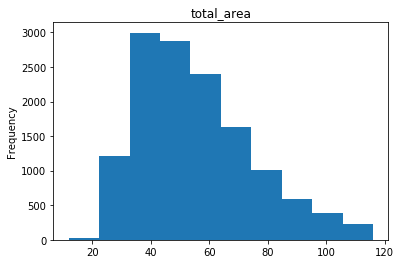

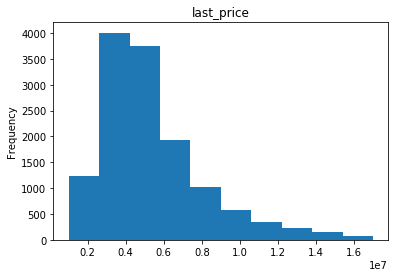

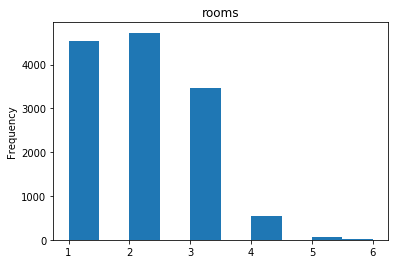

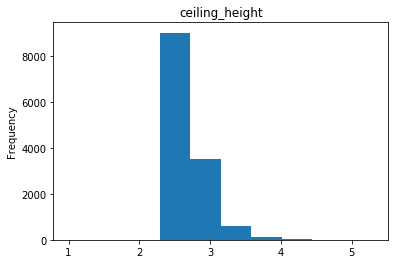

In [33]:
columns = ['total_area', 'last_price', 'rooms', 'ceiling_height']
for name in columns:
    flats_cut[name].plot(title=name, kind='hist', bins=10)
    plt.show()

Как писалось выше - удалять выбросы не будем, лучше продолжим работать с таблицой, где их нет. В дальнейшем анализ выбросов нам может пригодиться. Так, убрали крайние значение в столбцах 'total_area', 'last_price', 'rooms', 'ceiling_height'. В таблице не будут учитываться пропущенные значения в столбце ceiling_height, так как ранее мы их заменили на 0, а теперь они не вошли в срез.

### Факторы,  больше всего влияющие на стоимость квартиры

__Зависимость цены от квадратного метра__

In [34]:
flats_cut['last_price'].corr(flats_cut['total_area'])

0.7355564041960159

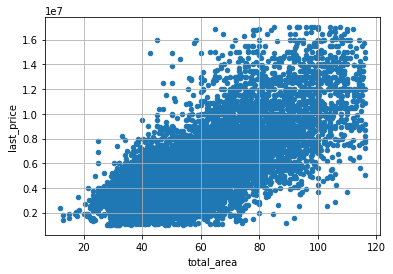

In [35]:
flats_cut.plot(x='total_area', y='last_price', kind='scatter', grid=True)

__Интересный результат__ В таблице без выбросов прослеживается прямая корреляция цены и площади квартиры. Чем больше площадб - тем больше цена 

__Зависимость цены от числа комнат__

In [36]:
flats_cut['last_price'].corr(flats_cut['rooms'])

0.44169550509413136

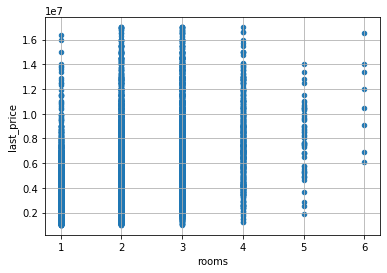

In [37]:
flats_cut.plot(x='rooms', y='last_price', kind='scatter', grid=True)

Как мы видим на графике, четырехкомнатная квартира может стоить столько же, сколько и однокомнатная. Есть отметки где помечено. Значимой зависимости не обнаружено.

__Зависимость цены от удаленности от цента__

In [38]:
flats_cut['last_price'].corr(flats_cut['cityCenters_nearest'])

-0.35216246023226216

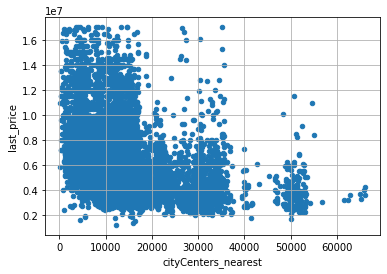

In [39]:
flats_cut.plot(x='cityCenters_nearest', y='last_price', kind='scatter', grid=True)

Как и ожидалось, хоть и не большая, но есть обратная зависимость, чем больше расстояние до центра, тем ниже цена. Особо этот коэффициент не назовешь значимым, но он есть. И надо его учесть при работе с отдельными городами. 

__Зависимость цены от этажа квартиры: первый, последний или другой__

In [40]:
flats_cut['last_price'].corr(flats_cut['floor_name'] == 'первый')

-0.12274861297842822

In [41]:
flats_cut['last_price'].corr(flats_cut['floor_name'] == 'другой')

0.12462603565272044

In [42]:
flats_cut['last_price'].corr(flats_cut['floor_name'] == 'последний')

-0.040759123027213746

Зависимость минимальная и не значима. Но даже в этих минимальных значениях есть интересные данные: что у квартир, которые находятся на первом и последнем этажах обратная зависимость. Значит, что квартиры на первом и последнем этажах дешевле квартир на остальных этажах. 

__Зависимость цены от даты размещения: день недели, мечсяц, год__

In [43]:
flats_cut['last_price'].corr(flats_cut['first_weekday_exposition'])

-0.024497787607734613

In [44]:

flats_cut['last_price'].corr(flats_cut['first_month_exposition'])

-0.0001296607216727535

In [45]:

flats_cut['last_price'].corr(flats_cut['first_year_exposition'])

-0.001702255460144501

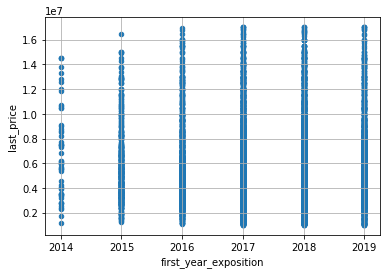

In [46]:
flats_cut.plot(x='first_year_exposition', y='last_price', kind='scatter', grid=True)

Значимой зависимости цены от дня недели и месяца нет. Год показвает коэффициент 0,03 - это тоже едва значимо. Так что год, месяц или день недели выставления на продажу не влияет на стоимость квартиры. 

 ### Изучение 10 населённых пунктов с наибольшим числом объявлений

In [47]:
flats['locality_name'].value_counts().head(10)
 

Санкт-Петербург      15721
посёлок Мурино         522
посёлок Шушары         440
Всеволожск             398
Пушкин                 369
Колпино                338
посёлок Парголово      327
Гатчина                307
деревня Кудрово        299
Выборг                 237
Name: locality_name, dtype: int64

In [48]:
top_10 = (
    flats
    .query('locality_name in ("Санкт-Петербург", "посёлок Мурино", "посёлок Шушары", "Всеволожск", "Пушкин", "Колпино","посёлок Парголово", "Гатчина", "деревня Кудрово", "Выборг")')
    .pivot_table(index= 'locality_name' ,values='price_meter',aggfunc=('mean'))
)
top_10.sort_values(by = 'price_meter', ascending = False)

           

,price_meter
locality_name,
Санкт-Петербург,114849.008794
Пушкин,103125.819291
деревня Кудрово,92473.547576
посёлок Парголово,90175.913458
посёлок Мурино,85752.189195
посёлок Шушары,78677.364217
Колпино,75424.579098
Гатчина,68746.146763
Всеволожск,68654.473986


Логичный вывод что самая высокая стоимость жилья будет в Санкт-Петербурге. Самая низкая оказалась в Выборге. Разница в цене за квадратный метр между Питером и Выборгом равна 56 000р. То есть в Питере в два раза стоит дороже квартиры, чем в Выборге.


Данные собрали по общей таблице "flats", так как число объявлений нам необходимо должно до срезов выбивающихся значений.

### Санкт-Петербург. Как меняются цены на квартиры в зависимости от расстояния до центра

In [49]:
S_Peterburg = (
    flats_cut
    .query('locality_name in ("Санкт-Петербург")')
    .loc[:, ('cityCenters_nearest', 'last_price', 'total_area', 'rooms', 'ceiling_height', 'floor_name', 'first_weekday_exposition', 'first_month_exposition', 'first_year_exposition')]
)

S_Peterburg['to_the_cetner_km'] = S_Peterburg['cityCenters_nearest'] / 1000
S_Peterburg['to_the_cetner_km'] = S_Peterburg['to_the_cetner_km'].round()
S_Peterburg.head(10)


,cityCenters_nearest,last_price,total_area,rooms,ceiling_height,floor_name,first_weekday_exposition,first_month_exposition,first_year_exposition,to_the_cetner_km
0,16028.0,13000000,108.0,3,2.70,другой,3,3,2019,16.0
4,8098.0,10000000,100.0,2,3.03,другой,1,6,2018,8.0
9,15008.0,5400000,61.0,3,2.50,другой,6,2,2017,15.0
10,13878.0,5050000,39.6,1,2.67,другой,3,11,2017,14.0
16,10698.0,6700000,82.0,3,3.05,первый,3,11,2017,11.0
18,10842.0,3250000,31.0,1,2.50,другой,4,1,2017,11.0
23,14211.0,2950000,32.0,1,2.60,последний,5,10,2016,14.0
25,14640.0,6800000,76.0,2,2.75,другой,3,10,2015,15.0
27,11456.0,7100000,70.0,3,2.60,другой,4,5,2017,11.0
31,12944.0,7200000,67.9,2,2.80,другой,3,10,2017,13.0


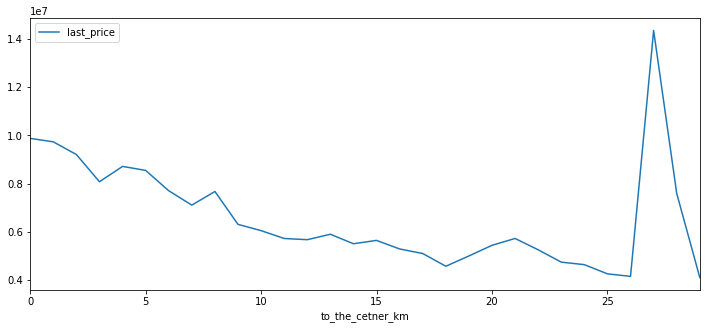

In [50]:
S_Peterburg_price_km = (
    S_Peterburg
    .pivot_table(index='to_the_cetner_km',values='last_price',aggfunc=('mean'))
    
)
S_Peterburg_price_km.plot(figsize=(12, 5))

In [51]:
S_Peterburg_price_km.query('25 <= to_the_cetner_km <= 30')

,last_price
to_the_cetner_km,
25.0,4267500.0
26.0,4162600.0
27.0,14350000.0
28.0,7600000.0
29.0,4114000.0


На графике видно, что цена резко снижается к 15 км от центра. Рассмотрим отрецоз в 15 км до центра отдельно. А так же интересны значения 25-30 км от центра. там наблюдается резкий скачек. Есть выбивающееся значение на 27 км, для анализа центра оно не пригодится

(0, 15)

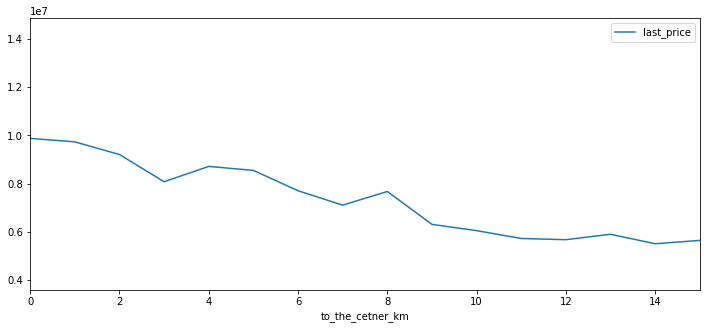

In [52]:
S_Peterburg_price_km.plot(figsize=(12, 5))
plt.xlim(0,15)

На это графике уже виднее, что самое высокое значение у 0 км от центра. Дальее идет плавнй спад к 10 км. Возьмем за основу, что центральная часть Санк-Петербурка это радиус 6 км от центра. 

### Анализ квартир в центре Санкт-Петербурга

In [53]:
S_Peterburg_center = (
    S_Peterburg
    .query('to_the_cetner_km <= 6')
    .loc[:, ('cityCenters_nearest', 'last_price', 'total_area', 'rooms', 'ceiling_height', 'floor_name', 'first_weekday_exposition', 'first_month_exposition', 'first_year_exposition')]
)
S_Peterburg_center.head(10)

,cityCenters_nearest,last_price,total_area,rooms,ceiling_height,floor_name,first_weekday_exposition,first_month_exposition,first_year_exposition
114,5791.0,4000000,21.4,1,2.90,другой,3,2,2019
136,3618.0,6500000,51.8,2,3.45,другой,2,8,2018
137,4263.0,13310800,85.1,2,2.70,другой,0,1,2018
143,6262.0,2990000,30.0,1,2.50,последний,2,6,2016
154,3167.0,8200000,80.0,3,4.15,другой,1,11,2018
159,4937.0,7050000,66.0,3,3.00,последний,0,9,2017
179,2559.0,14800000,108.7,3,4.00,последний,3,4,2019
181,3301.0,7900000,71.8,3,3.00,первый,2,8,2017
207,1645.0,9000000,72.6,2,2.90,другой,5,9,2018
213,1218.0,8700000,111.4,4,3.10,другой,0,10,2016


In [54]:
S_Peterburg_center['total_area'].describe()

count    1429.000000
mean       70.590658
std        22.199916
min        12.000000
25%        53.000000
50%        70.000000
75%        87.100000
max       116.000000
Name: total_area, dtype: float64

In [55]:
S_Peterburg_center.shape

(1429, 9)

In [56]:
S_Peterburg_center['last_price'].describe()

count    1.429000e+03
mean     8.512785e+06
std      2.973849e+06
min      1.600000e+06
25%      6.400000e+06
50%      8.000000e+06
75%      1.014000e+07
max      1.700000e+07
Name: last_price, dtype: float64

In [57]:
S_Peterburg_center['rooms'].describe()

count    1429.000000
mean        2.472358
std         0.992323
min         1.000000
25%         2.000000
50%         2.000000
75%         3.000000
max         6.000000
Name: rooms, dtype: float64

In [58]:
S_Peterburg_center['ceiling_height'].describe()

count    1429.000000
mean        3.055955
std         0.342853
min         2.400000
25%         2.800000
50%         3.000000
75%         3.210000
max         5.300000
Name: ceiling_height, dtype: float64

В центре не замечено особо каких=то крайних значений. Площадь квартир не вызывает вопросов, кол-ва комнат исходя из площади, тоже в пределах нормы, высота потолков выше 2,5 метров, возможно, это связано с тем, что здания старой постройки. Цена, для таких параметров тоже в пределах нормы.


In [59]:
S_Peterburg_center.corr()

,cityCenters_nearest,last_price,total_area,rooms,ceiling_height,first_weekday_exposition,first_month_exposition,first_year_exposition
cityCenters_nearest,1.000000,-0.140245,-0.150120,-0.145454,-0.258692,-0.002668,-0.015244,0.060669
last_price,-0.140245,1.000000,0.638883,0.355800,0.194200,-0.014030,-0.047486,-0.006565
total_area,-0.150120,0.638883,1.000000,0.765147,0.234763,-0.035748,-0.013581,-0.087217
rooms,-0.145454,0.355800,0.765147,1.000000,0.153983,-0.016656,-0.000083,-0.051411
ceiling_height,-0.258692,0.194200,0.234763,0.153983,1.000000,-0.016512,0.007705,0.004819
first_weekday_exposition,-0.002668,-0.014030,-0.035748,-0.016656,-0.016512,1.000000,0.012345,0.005747
first_month_exposition,-0.015244,-0.047486,-0.013581,-0.000083,0.007705,0.012345,1.000000,-0.224548
first_year_exposition,0.060669,-0.006565,-0.087217,-0.051411,0.004819,0.005747,-0.224548,1.000000


Значимая корреляция наблюдается у закономерных параметров: чем больше площадь квартиры, тем дороже ее цена. Число комнат не так сильно влияет на ценообразованеие, как и высота потолков. По остальным параметроам значимой корреляции нет. 

In [60]:
S_Peterburg.corr()

,cityCenters_nearest,last_price,total_area,rooms,ceiling_height,first_weekday_exposition,first_month_exposition,first_year_exposition,to_the_cetner_km
cityCenters_nearest,1.000000,-0.382208,-0.255449,-0.177350,-0.503980,-0.000496,0.003619,0.077729,0.998061
last_price,-0.382208,1.000000,0.800779,0.487106,0.467794,-0.026895,-0.001693,-0.016955,-0.383421
total_area,-0.255449,0.800779,1.000000,0.783418,0.385433,-0.026730,0.013623,-0.098452,-0.256470
rooms,-0.177350,0.487106,0.783418,1.000000,0.155008,-0.006201,0.003041,-0.050389,-0.176946
ceiling_height,-0.503980,0.467794,0.385433,0.155008,1.000000,-0.028633,0.006066,-0.096152,-0.503539
first_weekday_exposition,-0.000496,-0.026895,-0.026730,-0.006201,-0.028633,1.000000,-0.015621,0.006967,-0.001084
first_month_exposition,0.003619,-0.001693,0.013623,0.003041,0.006066,-0.015621,1.000000,-0.310512,0.002643
first_year_exposition,0.077729,-0.016955,-0.098452,-0.050389,-0.096152,0.006967,-0.310512,1.000000,0.077849
to_the_cetner_km,0.998061,-0.383421,-0.256470,-0.176946,-0.503539,-0.001084,0.002643,0.077849,1.000000


Если сравнивать центр Санкт-Петербурга и весь город, то получаются интересные данные: 

Корреляция между ценой и общей площадью сохраняется значимой, и даже возрастает, по сравнению с центром;

Колличество комнат и высота потолков не доходят до особо значимого уровня корреляции, но в ценообразовании оказывают свое влияние вне центра больше, чем в центре Санкт-Петербурга. 

### Шаг 5. Общий вывод

Была проведена работа с полученными данными. После изучения таблицы flats были найдены пропуски. В столбцах, где это было возможно, они были заполнены. 

Далее мы посмотрели на выбросы. Чтобы сохранить данные для дальнейшей работы, было решено от их не удалять, а сделать новую таблицу без выбросов. И продолжить работу с ней. Уже на основе данный в таблице flats_cut был проведен анализ по ценообразованию.

Самое большое влияение на стоимость квартиры имеет площадь этой самой квартиры. Зависимость прямая: чем больше площадь, тем выше цена. В городе Санкт-Петербурге, в цетре (радиус 6 км) а так же во всем городе не выявлено сильного влияния от расположенности к центру. Да, чем дальше от центра, тем квартира дешевле, но не значимо. Чуть больше влияния на ценообразование оказывает колличество комнат и высота потолков по всему городу, а не конкретно в центре. Но все равно значимыми параметроми их назвать нельзя. Можно сделать вывод, что основной параметр в ценообразовании - это площадь продаваемой квартиры, потом колличество комнат, высота потолков и уже после близость к центру. 

### Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод info())
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения
- [x]  есть пояснение какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение в каких столбцах изменены типы и почему
- [x]  посчитано и добавлено в таблицу: цена квадратного метра
- [x]  посчитано и добавлено в таблицу: день недели, месяц и год публикации объявления
- [x]  посчитано и добавлено в таблицу: этаж квартиры; варианты — первый, последний, другой
- [x]  посчитано и добавлено в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей
- [x]  изучены следующие параметры: площадь, цена, число комнат, высота потолков
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?"
- [x]  выполнено задание: "Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили."
- [x]  выполнено задание: "Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года. "Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце '*locality_name'*. "
- [x]  выполнено задание: "Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (*'locality_name'*). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона. "
- [x]  выполнено задание: "Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?"
- [x]  в каждом этапе есть выводы
- [x]  есть общий вывод